In [1]:
%matplotlib inline

In [114]:
import matplotlib.pyplot as plt
import math
import numpy as np

from effsim.paramgen import uniform_param_generator
from effsim.paramgen import distribution_param_generator
from effsim.effsim import EventSimulator
from effsim.effsim import NoiseMaker

from pytpc.hdfdata import HDFDataFile

import pytpc
from pytpc.tpcplot import pad_plot, chamber_plot
from pytpc.constants import degrees, pi

import csv
import yaml
import h5py

In [ ]:
##Steps to discretize events##

#generate parameters with uniform_param_generator
#generate simulated event (Python dictionary obect) (COULD ADD NOISE HERE?)  - seems to make more sense during generation
#convert simulated events to Event objects
#write this to our h5

#load h5 file and give it to discretizatio function
#loop through all events in h5 discretizing by taking evt.xyzs (COULD ADD NOISE HERE?)
#save discretized events to sparse csr_matrix

In [5]:
with open('/home/taylor/Documents/independent-research/req-files/config_e15503b_p.yml', 'r') as f:
    config = yaml.load(f)
    
beam_enu0 = config['beam_enu0']
#print(beam_enu0)
beam_mass = config['beam_mass']
beam_charge = config['beam_charge']
mass_num = config['mass_num']
max_beam_angle = (config['max_beam_angle']*math.pi)/180
#print(max_beam_angle)
beam_origin_z = config['beam_origin_z']

gas = pytpc.gases.InterpolatedGas('isobutane', 19.2)

# number of events to create
num_evts = 20

In [6]:
pgen = uniform_param_generator(beam_enu0, beam_mass, beam_charge, mass_num, max_beam_angle, beam_origin_z, gas, num_evts)

In [47]:
p = next(pgen)

#p[0][0] = -0.00791423
#p[0][1] =  0.0030299
#p[0][2] = 0.56803276
#p[0][3] = 1.83097548
#p[0][4] =  0.11137931
#p[0][5] =  2.01473709

print(p)

(array([  1.64253288e-03,  -9.53716931e-03,   4.80834616e-01,
         1.13005659e+00,   7.43352138e-01,   1.93554831e+00]), array([ 0.00249157, -0.01446699, -0.99989224]))


In [48]:
sim = EventSimulator(config)

In [49]:
evt, ctr = sim.make_event(p[0][0], p[0][1], p[0][2], p[0][3], p[0][4], p[0][5])
print(len(evt))

203


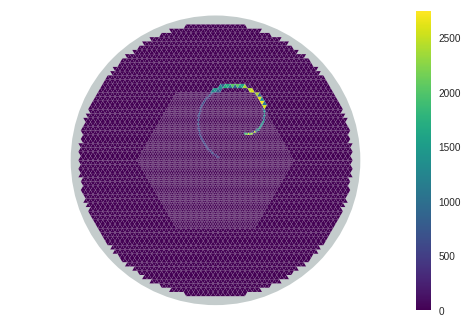

In [50]:
hits = np.zeros(10240)
for k, v in evt.items():
    hits[k] += v.max()
        
fig, sm = pad_plot(hits, scale='linear', cmap='viridis')
plt.colorbar(sm)

# Adding Random Noise

In [54]:
print(type(evt))

<class 'dict'>


In [68]:
print(evt.keys())

dict_keys([148, 149, 151, 153, 154, 155, 156, 157, 158, 436, 439, 441, 442, 443, 444, 445, 446, 447, 448, 451, 453, 723, 725, 726, 727, 728, 729, 730, 732, 1004, 1006, 1007, 1008, 1011, 1013, 1278, 1280, 1281, 1282, 1545, 1547, 1548, 1549, 1550, 1808, 1809, 1810, 1811, 1812, 1813, 1815, 1881, 1882, 1884, 1885, 1887, 1888, 1890, 1893, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1905, 1907, 2066, 2067, 2068, 2069, 2070, 2071, 2161, 2163, 2164, 2165, 2166, 2167, 2168, 2170, 2317, 2318, 2319, 2320, 2321, 2322, 2420, 2421, 2422, 2423, 2424, 2426, 2562, 2563, 2564, 2565, 2566, 2567, 2668, 2669, 2670, 2671, 2672, 2673, 2675, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2908, 2909, 2910, 2911, 2912, 2913, 3032, 3033, 3034, 3035, 3036, 3037, 3039, 3138, 3139, 3140, 3141, 3142, 3143, 3257, 3259, 3260, 3261, 3262, 3263, 3264, 3360, 3361, 3362, 3363, 3477, 3479, 3480, 3481, 3482, 3484, 3486, 3574, 3575, 3689, 3691, 3692, 3693, 3694, 3695, 3696, 3698, 3778, 3779, 3893, 3895, 3896, 3897, 3898, 3899

In [108]:
#print(evt.get(148))

In [213]:
pyevt = sim.convert_event(evt)

In [214]:
print(pyevt)

Event 0, timestamp 0.
Contains 203 traces.


In [215]:
print(type(pyevt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)))

<class 'numpy.ndarray'>


In [216]:
xyzs = pyevt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
print(len(xyzs))
print(xyzs.shape)
print(xyzs)

203
(203, 5)
[[ -2.45411757e+00   7.05056055e+00   1.18976190e+02   1.50000000e+01
    1.48000000e+02]
 [  1.37667655e-14   5.70140844e+00   1.18976307e+02   3.09255733e+01
    1.49000000e+02]
 [  2.45411757e+00   7.05056055e+00   1.19031327e+02   4.01046004e+02
    1.51000000e+02]
 ..., 
 [  5.88988218e+01   1.47389953e+02   9.94643968e+01   2.37452205e+03
    4.15900000e+03]
 [  6.38070569e+01   1.50359190e+02   9.89850651e+01   1.70830190e+02
    4.16000000e+03]
 [  6.87152921e+01   1.47389953e+02   9.89597663e+01   1.70887933e+02
    4.16100000e+03]]


In [217]:
#noise requirements:
#x and y: -DETECTOR_RADIUS < __ < +DETECTOR_RADIUS
#z: 0 < __ < DETECTOR_LENGTH

DETECTOR_LENGTH = 1000.0
DETECTOR_RADIUS = 275.0

In [218]:
#add new noise, not just randomly osciallate existing points - np.random.___()

In [224]:
num_noisepts = np.random.randint(20, 300,)    #20-300
print(num_noisepts)

213


In [225]:
#generate x and y based on random pad numbers
paddresses = np.random.randint(0,10240, (num_noisepts, 1))
print(paddresses.shape)

pads = pytpc.generate_pad_plane()
pcenters = pads.mean(1)

xys = pcenters[paddresses].reshape(num_noisepts, 2)
print(xys.shape)
#z and charge values are generated randomly in realistic ranges
zs = np.random.uniform(0, DETECTOR_LENGTH, (num_noisepts, 1))
print(zs.shape)

charges = np.random.uniform(1, 4000, (num_noisepts, 1))  #1-4000
print(charges.shape)

(213, 1)
(213, 2)
(213, 1)
(213, 1)


In [226]:
#note in discretization we do not need to return the pad addresses
noise_mat = np.hstack((xys, zs, charges, paddresses))

In [227]:
print(noise_mat)

[[   22.08705817  -109.0663124     50.22872769  2186.16094065  8421.        ]
 [  -98.16470299    56.70928436   598.08136716  1829.44851508  1756.        ]
 [   85.89411511   -43.95731538   695.51967071   481.18438367  6762.        ]
 ..., 
 [  117.79764359  -141.85787757   316.86448698  3610.85367504  9197.        ]
 [   78.53176239   107.71716029   700.048317    1101.82785187  3347.        ]
 [  -90.80235026     9.95206476   151.28793293  1581.34612891   373.        ]]


In [228]:
clean_xyzs = xyzs
noise_xyzs = np.vstack((xyzs, noise_mat))

In [229]:
print(clean_xyzs.shape)
print(noise_xyzs.shape)

(203, 5)
(416, 5)


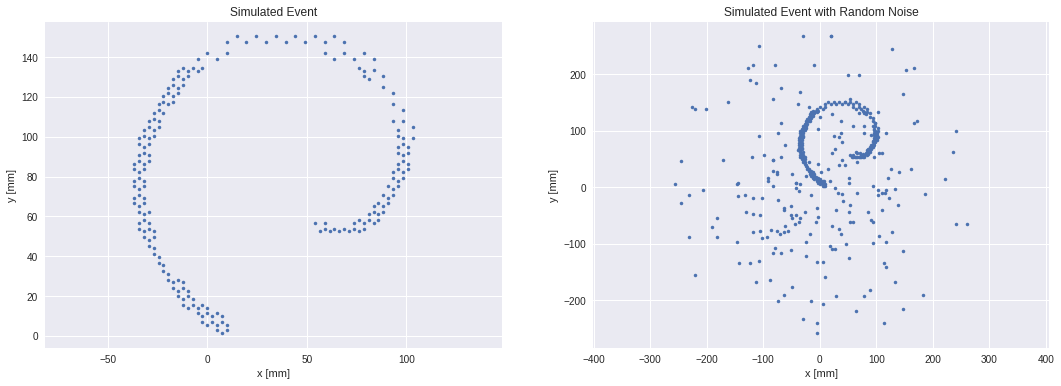

In [230]:
fig, ax = plt.subplots(1, 2, squeeze=True, figsize=(18, 6))

ax[0].plot(clean_xyzs[:,0], clean_xyzs[:,1], '.')
ax[0].axis('equal')
        
ax[0].set_xlabel('x [mm]')
ax[0].set_ylabel('y [mm]')
ax[0].set_title('Simulated Event')

#######################################################################################################################
ax[1].plot(noise_xyzs[:,0], noise_xyzs[:,1], '.')
ax[1].axis('equal')
        
ax[1].set_xlabel('x [mm]')
ax[1].set_ylabel('y [mm]')
ax[1].set_title('Simulated Event with Random Noise')

# Compare to discretized

In [231]:
DETECTOR_LENGTH = 1000.0
DETECTOR_RADIUS = 275.0

x_disc = 20
y_disc = 20
z_disc = 20

discElements = x_disc*y_disc*z_disc

x_inc = (2*DETECTOR_RADIUS)/x_disc
y_inc = (2*DETECTOR_RADIUS)/y_disc
z_inc = DETECTOR_LENGTH/z_disc

In [232]:
discretized_dataClean = np.zeros((1, discElements))
discretized_xyzClean = np.zeros([clean_xyzs.shape[0], clean_xyzs.shape[1]])

num_pts = 0

for point in clean_xyzs:
    x_bucket = math.floor(((point[0]+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*x_disc)
    y_bucket = math.floor(((point[1]+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*y_disc)
    z_bucket = math.floor((point[2]/DETECTOR_LENGTH)*z_disc)

    bucket_num = z_bucket*x_disc*y_disc + x_bucket + y_bucket*x_disc
    discretized_dataClean[0,bucket_num] = 1

    avg_x = -DETECTOR_RADIUS + ((2*x_bucket+1)*x_inc)/2.0
    avg_y = -DETECTOR_RADIUS + ((2*y_bucket+1)*y_inc)/2.0
    avg_z = ((2*z_bucket+1)*z_inc)/2.0                          
    
    discretized_xyzClean[num_pts] = [avg_x, avg_y, avg_z, point[3], point[4]]
    
    num_pts += 1

print("buckets filled: " + str(discretized_dataClean.sum()))

buckets filled: 21.0


In [233]:
discretized_dataNoise = np.zeros((1, discElements))
discretized_xyzNoise = np.zeros([noisy_xyzs.shape[0],noisy_xyzs.shape[1]])

num_pts = 0

for point in noisy_xyzs:
    x_bucket = math.floor(((point[0]+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*x_disc)
    y_bucket = math.floor(((point[1]+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*y_disc)
    z_bucket = math.floor((point[2]/DETECTOR_LENGTH)*z_disc)

    bucket_num = z_bucket*x_disc*y_disc + x_bucket + y_bucket*x_disc
    discretized_dataNoise[0,bucket_num] = 1

    avg_x = -DETECTOR_RADIUS + ((2*x_bucket+1)*x_inc)/2.0
    avg_y = -DETECTOR_RADIUS + ((2*y_bucket+1)*y_inc)/2.0
    avg_z = ((2*z_bucket+1)*z_inc)/2.0                          
    
    discretized_xyzNoise[num_pts] = [avg_x, avg_y, avg_z, point[3], point[4]]
    
    num_pts += 1

print("buckets filled: " + str(discretized_dataNoise.sum()))

buckets filled: 199.0


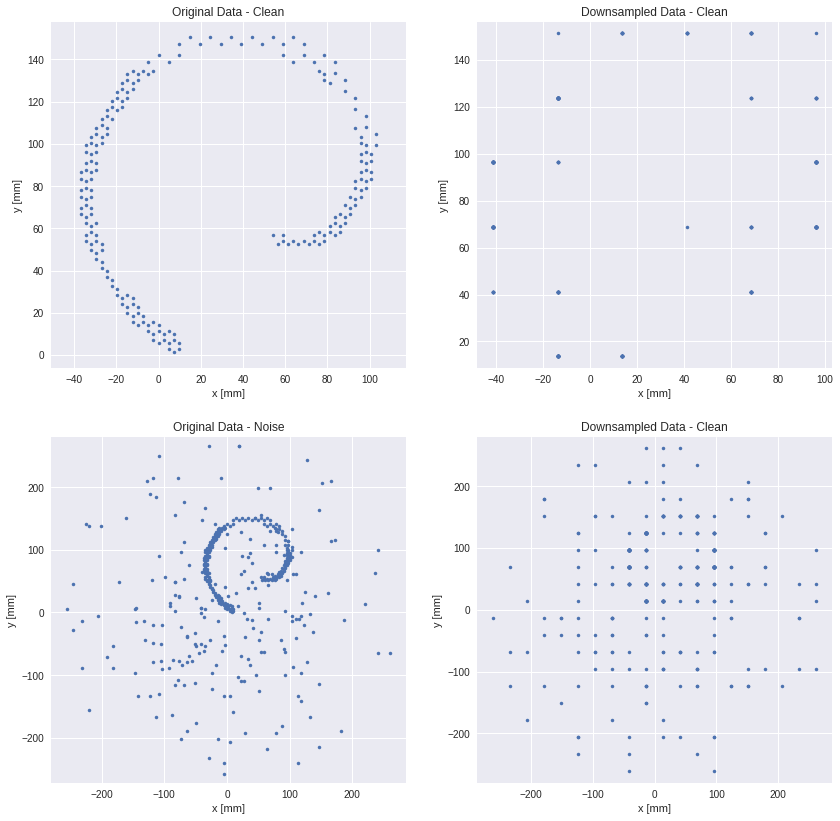

In [234]:
fig, ax = plt.subplots(2, 2, squeeze=True, figsize=(14, 14))

ax[0][0].plot(clean_xyzs[:,0], clean_xyzs[:,1], '.')
ax[0][0].axis('equal')
        
ax[0][0].set_xlabel('x [mm]')
ax[0][0].set_ylabel('y [mm]')
ax[0][0].set_title('Original Data - Clean')

#######################################################################################################################
ax[0][1].plot(discretized_xyzClean[:,0], discretized_xyzClean[:,1], '.')
ax[0][1].axis('equal')
        
ax[0][1].set_xlabel('x [mm]')
ax[0][1].set_ylabel('y [mm]')
ax[0][1].set_title('Downsampled Data - Clean')

#######################################################################################################################
ax[1][0].plot(noise_xyzs[:,0], noise_xyzs[:,1], '.')
ax[1][0].axis('equal')
        
ax[1][0].set_xlabel('x [mm]')
ax[1][0].set_ylabel('y [mm]')
ax[1][0].set_title('Original Data - Noise')

#######################################################################################################################
ax[1][1].plot(discretized_xyzNoise[:,0], discretized_xyzNoise[:,1], '.')
ax[1][1].axis('equal')
        
ax[1][1].set_xlabel('x [mm]')
ax[1][1].set_ylabel('y [mm]')
ax[1][1].set_title('Downsampled Data - Clean')

In [235]:
#3d comparisons!!true

# pad num -> xy

In [155]:
nums = np.random.randint(0,10240, (num_noisepts, 1))

In [156]:
pads = pytpc.generate_pad_plane()
pcenters = pads.mean(1)

In [157]:
xys = pcenters[nums]

In [159]:
print(xys)

[[[  5.88988218e+01  -2.43873629e+02]]

 [[  1.47247054e+01  -1.13012169e+01]]

 [[  7.36235272e+00  -9.20636871e+01]]

 [[  9.81647030e+00   2.43873629e+02]]

 [[  1.32522349e+02  -1.13012169e+01]]

 [[  1.96329406e+01   2.60876255e+02]]

 [[  1.22705879e+02  -1.16353940e+02]]

 [[  9.81647030e+00  -7.08104055e+01]]

 [[ -1.81604701e+02   1.89896516e+02]]

 [[  5.39905866e+01   2.69377567e+02]]

 [[  1.37667655e-14  -3.97066591e+01]]

 [[  7.60776448e+01   1.00565000e+02]]

 [[  3.68117636e+01  -7.50610618e+01]]

 [[  1.37430584e+02   4.53742008e+01]]

 [[ -1.12889408e+02   1.21886015e+02]]

 [[  4.66282339e+01   7.79625660e+01]]

 [[  9.57105854e+01   1.84533774e+01]]

 [[  3.43576460e+01   7.93117181e+01]]

 [[  9.32564678e+01  -3.68051548e+01]]

 [[ -8.58941151e+01  -8.64638787e+01]]

 [[ -4.66282339e+01  -9.49651913e+01]]

 [[ -2.94494109e+01  -2.66408330e+02]]

 [[  5.15364691e+01   4.95571238e+01]]

 [[ -1.27614114e+02   2.43873629e+02]]

 [[ -1.96329406e+01  -1.30319594e+02]]



In [161]:
print(xys.reshape(xys.shape[0], 2).shape)

(180, 2)
